# 🏥 Predicting Hospital Readmission Using Random Forest (Python)

This project demonstrates how structured hospital data can be used to predict the likelihood of patient readmission using a Random Forest model — a valuable skillset in data-driven healthcare roles such as those in the NHS.

### 📥 Install packages

Before running this notebook these Python libraries must be installed as they are needed for data analysis, machine learning and data visualisation.

In [ ]:
pip install; pandas scikit-learn; matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\natma\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Tools used :

- pandas - data-manipulation
- scikit-learn - machine learning (Random forest, evaluation)
- matplotlib - for visualising feature importance

### 🧰 Importing Required Libraries

Here, we are importing the essential Python libraries

- 'pandas' is used for handing and manipulating tabular data
- 'matplotlib.pyplot' is for creating visualisations
- 'train_test_split' helps divide data into training and test sets
- 'RandomForestClassifier' is the machine learning model we'll be using
- 'classification_report' and 'confusion_matrix' help to evaluate the model's performance
- 'LabelEncoder' allows the model to digest categorical values as numbers instead for compatibility 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

### 📥 Loading the Dataset

We load/connect the hospital readmission dataset from a CSV file. This data simulates hospital patient records, including factors such as age, number of medications, and readmission status. `df.head()` displays the first five rows to confirm the data loaded correctly. In this case, there are only 5 rows of data.


In [2]:
df = pd.read_csv('data/sample_hospital_readmissions.csv')
df.head()

,age,num_medications,time_in_hospital,number_inpatient,number_emergency,number_diagnoses,A1Cresult,insulin,change,diabetesMed,readmitted_binary
0,[70-80),13,3,0,0,9,>8,No,Ch,Yes,1
1,[60-70),8,2,0,1,6,NaN,Up,No,Yes,0
2,[50-60),11,4,1,0,7,>7,Steady,Ch,Yes,1
3,[40-50),6,1,0,0,5,Norm,Down,Ch,No,0
4,[30-40),9,2,0,0,4,NaN,No,No,Yes,0


### 🔡 Encoding Categorical Variables

Machine learning models often use numerical inputs. This step uses `LabelEncoder` to `transform` categorical values like `"Yes"`, `"No"` or age ranges (e.g., `[30-40)`) into integers (0, 1, 2 etc) and replaces the original values so they can be used in the Random Forest model.

In [3]:
categorical_cols = ['age', 'A1Cresult', 'insulin', 'change', 'diabetesMed']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

### ✂️ Splitting the Data into Train/Test Sets

To evaluate our model properly, we split the dataset:
- `X` contains features (input variables)
- `y` is the target variable (readmission: 1 = Yes, 0 = No)
- We use an 80/20 split: 80% for training, 20% for testing (0.2)

In [ ]:
X = df.drop('readmitted_binary', axis=1) # x = every columns EXCEPT 'readmitted_binary' which has been dropped (target variable column)
y = df['readmitted_binary'] # assigns 'readmitted_binary' as target variable, holds all features for prediction model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🌲 Training a Random Forest Classifier

We create and train a `RandomForestClassifier`, a powerful ensemble model that works well with tabular data. It builds multiple decision trees and averages them for more stable and accurate predictions.

In [ ]:
model = RandomForestClassifier(random_state=42) 
# ensures 'reproducible' randomness

model.fit(X_train, y_train) 
# This lines TRAINS the Random Forest model #.fit() teaches model to LEARN the patterns from inputs and outputs
# X_train contains input features fpr training sample, y_train contains corresponding labels (readmission)

RandomForestClassifier(random_state=42)

### 📊 Making Predictions

After training, the model is used to predict patient readmission outcomes on the unseen test data (`X_test`). These predictions are stored in `y_pred`.

In [6]:
y_pred = model.predict(X_test)

### 🧪 Evaluating the Model

We now use:
- `confusion_matrix` to see how many predictions were correct/incorrect
- `classification_report` to get precision, recall, F1-score and accuracy - key metrics for evaluating the usefulness of our model in a healthcare setting.

In [7]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\natma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


### 📉 Visualising Feature Importance

This chart shows which features (like medications, age, time in hospital) were most influential in predicting whether a patient was readmitted. This is valuable for clinicians and analysts to understand what drives readmission risk.

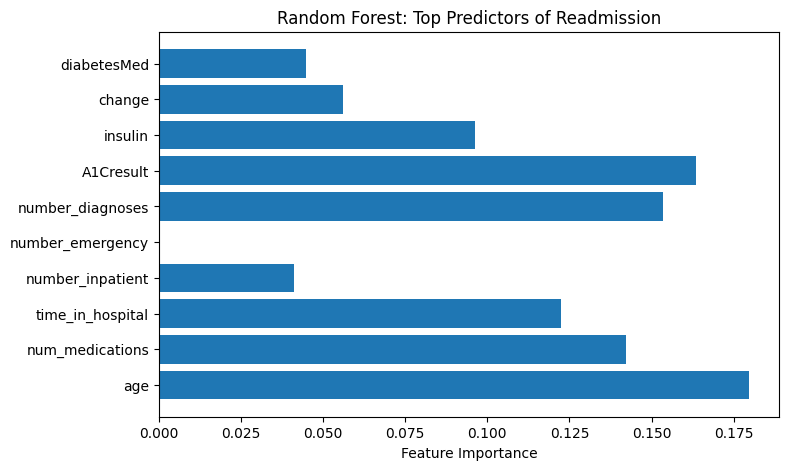

In [8]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest: Top Predictors of Readmission")
plt.show()